# To Explore Business Analytics

#### TASK : To Perform Exploratory Data Analysis on the SampleSuperstore Dataset¶

#### By- Abhijeet Singh

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
Data=pd.read_csv("SampleSuperstore.csv")

In [3]:
Data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
Data.shape

(9994, 13)

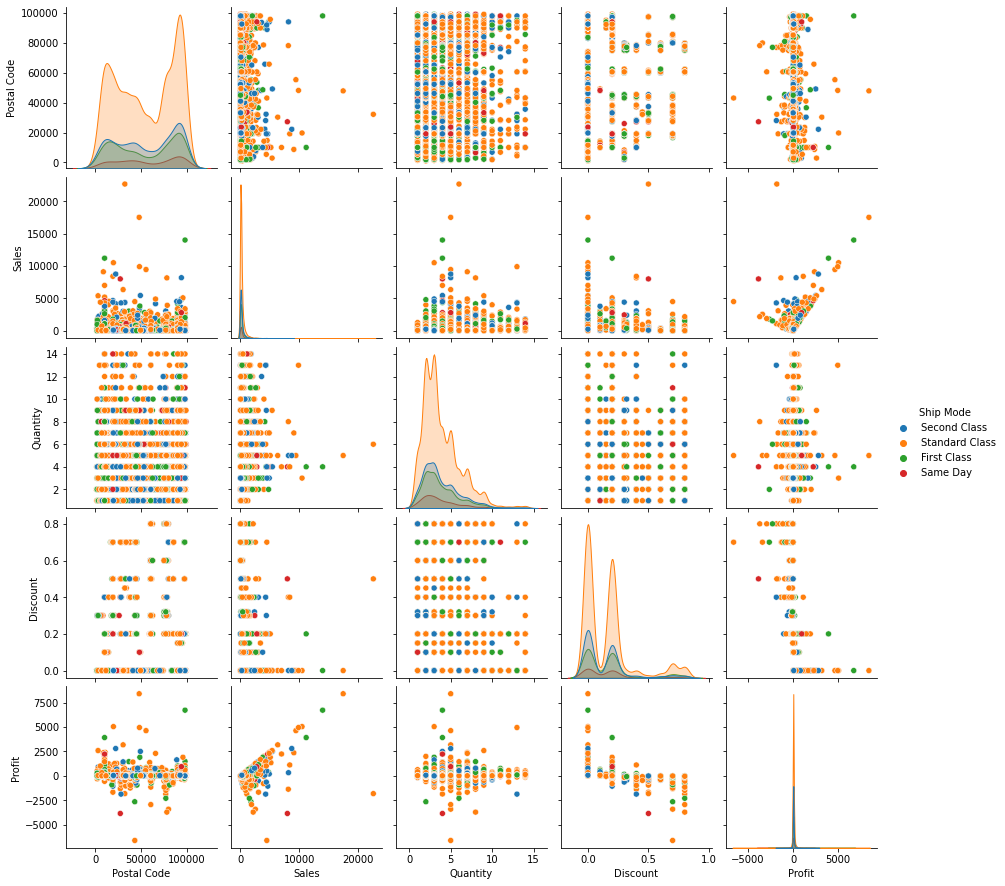

In [5]:
#Visualize the data
sns.pairplot(Data,hue="Ship Mode")

In [6]:
#Find the number and names of unique values in each column of the dataset.
Data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
#Getting basic info of data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#checking for null values
Data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#Checking for unique values in diff columns
Data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
Ship_Mode=Data['Ship Mode'].unique()
city=Data['City'].unique()
state=Data['State'].unique()
reg=Data['Region'].unique()
cat=Data['Category'].unique()
sub_category=Data['Sub-Category'].unique()

In [11]:
Data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
#we can remove postal code and country column becasue they not useful.
Data=Data.drop(['Postal Code','Country'],axis=1)


In [13]:
#Finding duplicates
Data.duplicated().sum()

50

In [14]:
Data.drop_duplicates()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


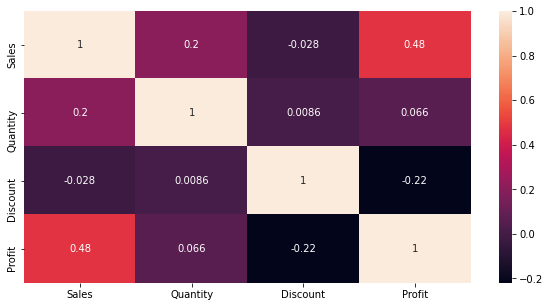

In [15]:
#Correlation matrix
correlation=Data.corr
plt.figure(figsize=(10,5))
sns.heatmap(Data.corr(),annot=True)

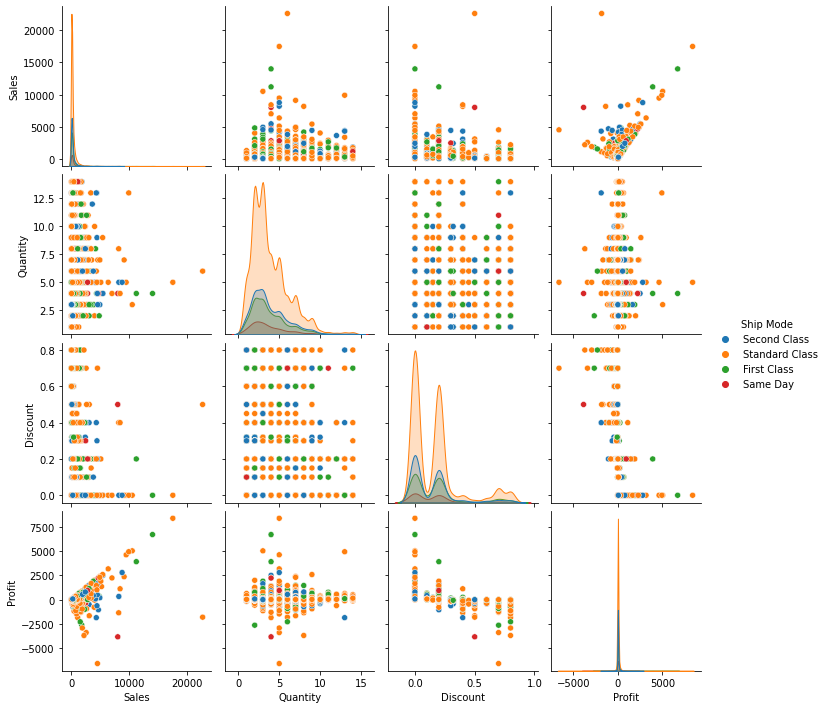

In [16]:
sns.pairplot(Data,hue="Ship Mode")

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Billings           1
Cedar Rapids       1
Littleton          1
Whittier           1
Missouri City      1
Name: City, Length: 531, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

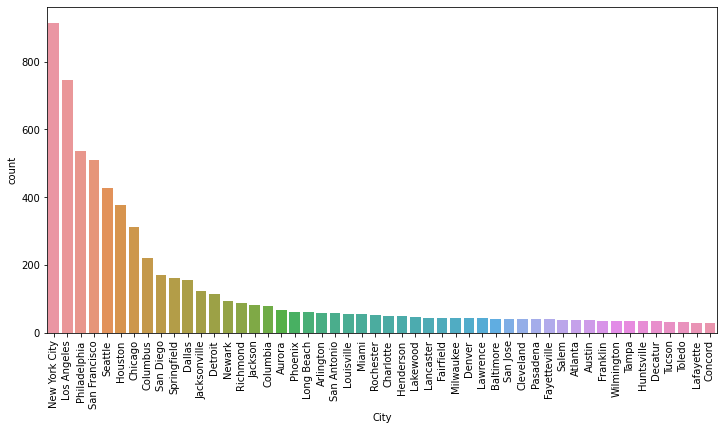

In [17]:
print (Data['City'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(x=Data['City'], order=(Data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

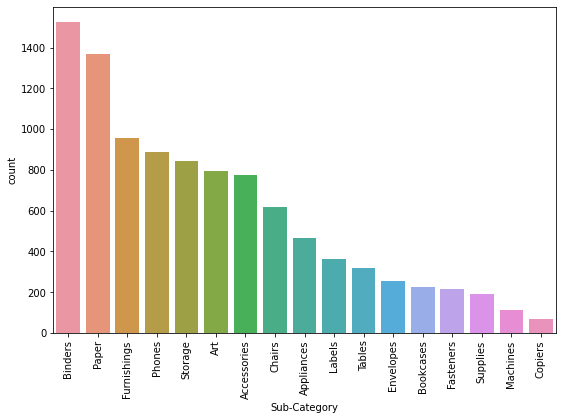

In [18]:
print (Data['Sub-Category'].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x=Data['Sub-Category'], order=(Data['Sub-Category'].value_counts().head(50)).index)
plt.xticks(rotation=90)

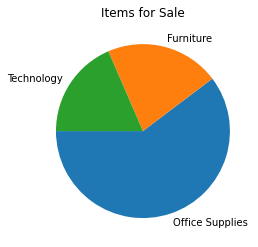

In [19]:
plt.pie(Data['Category'].value_counts(), labels=Data['Category'].value_counts().index, startangle=180, radius=1)
plt.title('Items for Sale')
plt.show()

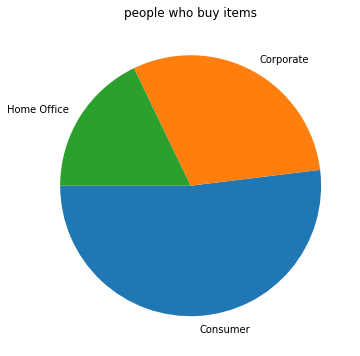

In [20]:

plt.figure(figsize=(12,6))
plt.pie(Data['Segment'].value_counts(), labels=Data['Segment'].value_counts().index, startangle=180, radius=1)
plt.title('people who buy items')
plt.show()

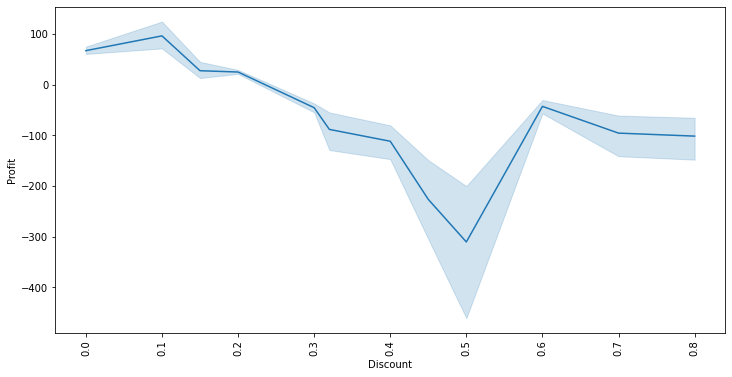

In [21]:
#profit vs Discount
plt.figure(figsize=(12,6))
sns.lineplot(x=Data['Discount'], y=Data['Profit'])
plt.xticks(rotation=90)
plt.show()

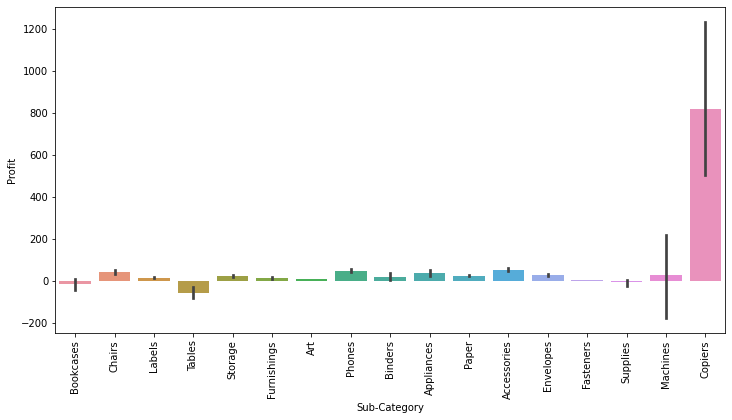

In [22]:
#profit vs subcategory
plt.figure(figsize=(12,6))
sns.barplot(x=Data['Sub-Category'], y=Data['Profit'])
plt.xticks(rotation=90)
plt.show()

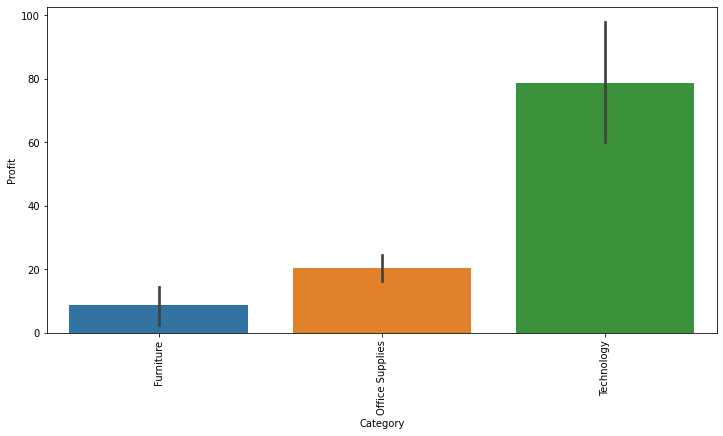

In [23]:
# Category vs Profit
plt.figure(figsize=(12,6))
sns.barplot(x=Data['Category'], y=Data['Profit'])
plt.xticks(rotation=90)
plt.show()

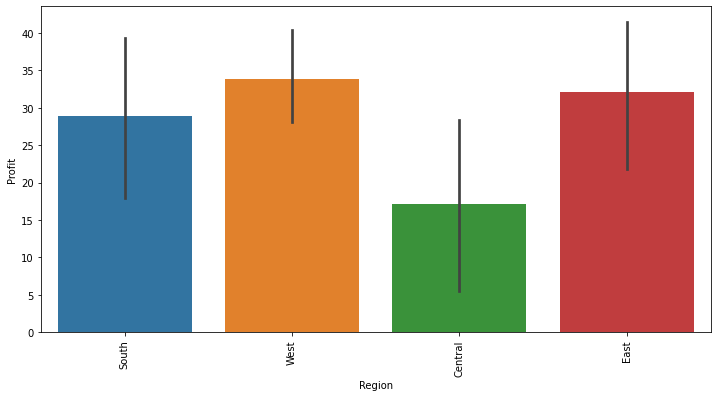

In [24]:
#Region vs profit
plt.figure(figsize=(12,6))
sns.barplot(x=Data['Region'], y=Data['Profit'])
plt.xticks(rotation=90)
plt.show()

### NOTE:

#### The Dataset describes the sales data of United States.



##### There is a positive correlation between Sales and Profit, Sales and quantity

#### There is a negative correlation between Profit and Discount.

#### The highest number of sales is from New York City

#### "Binders" is the item that has the most sales.

#### The most profit is obtained from Copiers. To Increase overall profit, increase the sales of Table

#### Technology has highest profit as compared to other category.

#### The maximum profit is from the West Region of the US.